# World Data League 2022

## Notebook Submission Template

This notebook is one of the mandatory deliverables when you submit your solution. Its structure follows the WDL evaluation criteria and it has dedicated cells where you should add information. Make sure your code is readable as it will be the only technical support the jury will have to evaluate your work. Make sure to list all the datasets used besides the ones provided.

Instructions:
1. 🧱 Create a separate copy of this template and **do not change** the predefined structure [x]
2. 👥 Fill in the Authors section with the name of each team member [x]
3. 💻 Develop your code - make sure to add comments and save all the output you want the jury to see. Your code **must be** runnable!
4. 📄 Fill in all the text sections
5. 🗑️ Remove this section (‘Notebook Submission Template’) and any instructions inside other sections
6. 📥 Export as HTML and make sure all the visualisations are visible.
7. ⬆️ Upload the .ipynb file to the submission platform and make sure that all the visualisations are visible and everything (text, images, ..) in all deliverables renders correctly.


## 🎯 Challenge
*Predicting a safety score for women in Costa Rica*


## Team: Data Crocodiles
## 👥 Authors
* Diogo Pessoa
* Fábio Lopes
* Francisco Valente
* Júlio Medeiros

## 💻 Development
Start coding here! 🐱‍🏍

Create the necessary subsections (e.g. EDA, different experiments, etc..) and markdown cells to include descriptions of your work where you see fit. Comment your code. 

All new subsections must start with three hash characters.

Pro-tip 1: Don't forget to make the jury's life easier. Remove any unnecessary prints before submitting the work. Hide any long output cells (from training a model for example). For each subsection, have a quick introduction (justifying what you are about to do) and conclusion (results you got from what you did). 

Pro-tip 2: Have many similiar graphs which all tell the same story? Add them to the appendix and show only a couple of examples, with the mention that all the others are in the appendix.

### Requirements

Installing packages required to develop the project

In [69]:
%pip install matplotlib==3.4.3
%pip install shap
%pip install holidays
%pip install suntime

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Import Packages

Importing packages required to develop the project

In [70]:
import os
import io
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import requests
import datetime
import zipfile
from suntime import Sun
import holidays
import warnings
warnings.filterwarnings("ignore")

### Custom Functions

Functions developed by us to perform our analysis

In [81]:
def download_data(url,folder_name):
    '''
    Verify whether data is available and if not, download it.
    Input: 
        url: Dataset URL
        folder_name: Directory to store data
    '''
    if os.path.isdir(folder_name)==False:
        print("Downloading Data...")
        r = requests.get(url, stream=True)
        z = zipfile.ZipFile(io.BytesIO(r.content))
        z.extractall()
        print("Data successfully downloaded!")
    else:
        print("Data was already downloaded.")
    
    return None

def get_arcgis_data(arcgis_folder):
    '''
    Obtain arcGIS data
    Input:
        arcgis_folder: Folder where arcGIS data are stored
    Output:
        arcgis_data: Dictionary with all arcGIS data
    '''

    # Python dictionary to save all arcGIS data
    arcgis_data = {}

    arcgis_data['Districts'] = pd.read_csv(f'{arcgis_folder}/arcGIS_districts.csv')
    arcgis_data['Road Centers'] = pd.read_csv(f'{arcgis_folder}/arcGIS_centro_vias.csv')
    arcgis_data['Water'] = pd.read_csv(f'{arcgis_folder}/arcGIS_agua.csv')
    arcgis_data['City Center'] = pd.read_csv(f'{arcgis_folder}/arcGIS_catasto_central.csv')
    arcgis_data['Condos Boundaries'] = pd.read_csv(f'{arcgis_folder}/arcGIS_catasto_codominios.csv')
    arcgis_data['Cadastral Roads'] = pd.read_csv(f'{arcgis_folder}/arcGIS_catasto_vias.csv')
    arcgis_data['Blocks Boundaries'] = pd.read_csv(f'{arcgis_folder}/arcGIS_catasto_bloque.csv')
    arcgis_data['Estates Boundaries'] = pd.read_csv(f'{arcgis_folder}/arcGIS_catasto_predios.csv')
    arcgis_data['Roads'] = pd.read_csv(f'{arcgis_folder}/arcGIS_vialidad.csv')
    arcgis_data['Setbacks'] = pd.read_csv(f'{arcgis_folder}/arcGIS_retiros.csv')
    arcgis_data['Land Use Zones'] = pd.read_csv(f'{arcgis_folder}/arcGIS_zonas.csv')
    arcgis_data['Susceptible Zones'] = pd.read_csv(f'{arcgis_folder}/arcGIS_susceptibilidad.csv')
    arcgis_data['Heritage'] = pd.read_csv(f'{arcgis_folder}/arcGIS_patrimonio.csv')
    arcgis_data['Public Areas'] = pd.read_csv(f'{arcgis_folder}/arcGIS_areas_public_use.csv')
    arcgis_data['Green Areas'] = pd.read_csv(f'{arcgis_folder}/arcGIS_green_areas.csv')
    arcgis_data['Security'] = pd.read_csv(f'{arcgis_folder}/arcGIS_security.csv')
    arcgis_data['Churches'] = pd.read_csv(f'{arcgis_folder}/arcGIS_churches.csv')
    arcgis_data['Schools'] = pd.read_csv(f'{arcgis_folder}/arcGIS_education.csv')
    arcgis_data['Culture'] = pd.read_csv(f'{arcgis_folder}/arcGIS_entertainment_culture.csv')
    arcgis_data['Governmental'] = pd.read_csv(f'{arcgis_folder}/arcGIS_governmental.csv')
    arcgis_data['Communal Areas'] = pd.read_csv(f'{arcgis_folder}/arcGIS_communal_areas.csv')
    arcgis_data['Commercial Centers'] = pd.read_csv(f'{arcgis_folder}/arcGIS_commercial_centers.csv')
    arcgis_data['Housing Complexes'] = pd.read_csv(f'{arcgis_folder}/arcGIS_housing_complexes.csv')
    arcgis_data['Healthcare'] = pd.read_csv(f'{arcgis_folder}/arcGIS_healthcare.csv')

    return arcgis_data

def merge_date_time(dataframe):
    '''
    Merge Date column with Time column
    Input:
        dataframe: Dataset with Date column and Time column in string format
    Output:
        dataframe: Dataset with Start Datetime and End Datetime columns in datetime format
    '''
    # Convert date to datetime
    dataframe['Date'] = pd.to_datetime(dataframe['Date'],format="%d.%m.%y")

    # Create year, month, and day columns in crime records data
    dataframe['Year'] = dataframe['Date'].dt.year
    dataframe['Month'] = dataframe['Date'].dt.month
    dataframe['Day'] = dataframe['Date'].dt.day

    # Get start crime time and end crime time
    dataframe[['Start Time','End Time']] = dataframe['Time'].str.split(' - ',expand=True)
    dataframe[['Start Hour','Start Minute','Start Second']] = dataframe['Start Time'].str.split(':',expand=True)
    dataframe[['End Hour','End Minute','End Second']] = dataframe['End Time'].str.split(':',expand=True)

    # Convert columns from string to numeric
    dataframe["Start Hour"] = pd.to_numeric(dataframe["Start Hour"])
    dataframe["Start Minute"] = pd.to_numeric(dataframe["Start Minute"])
    dataframe["Start Second"] = pd.to_numeric(dataframe["Start Second"])
    dataframe["End Hour"] = pd.to_numeric(dataframe["End Hour"])
    dataframe["End Minute"] = pd.to_numeric(dataframe["End Minute"])
    dataframe["End Second"] = pd.to_numeric(dataframe["End Second"])

    # Obtain start and end datetimes dict(year=df.Y, month=df.M, day=df.D)
    dataframe['Start Datetime'] = pd.to_datetime(dict(year = dataframe['Year'], month = dataframe['Month'],
                                                                day = dataframe['Day'], hour = dataframe['Start Hour'],
                                                                minute = dataframe['Start Minute'], second = dataframe['Start Second']))

    dataframe['End Datetime'] = pd.to_datetime(dict(year = dataframe['Year'], month = dataframe['Month'],
                                                            day = dataframe['Day'], hour = dataframe['End Hour'],
                                                            minute = dataframe['End Minute'], second = dataframe['End Second']))

    # Remove Date column
    #dataframe.drop(['Date', 'Year', 'Month', 'Day', 'Start Hour', 'Start Minute', 'Start Second',
    #                        'End Hour', 'End Minute', 'End Second', 'Time', 'Start Time', 'End Time'], inplace=True, axis=1)
    
    return dataframe

def get_date_features(dataframe):
    '''
    Extract features from the datetimes
    Input:
        dataframe: Initial Dataset
    Output:
        dataframe: Dataset with features extracted from datetimes
    '''
    # Get number of samples
    number_samples = dataframe.shape[0]
    
    # Get weekday name for each index returned by weekday function provided by pandas library
    dataframe_weekdays = []
    dataframe_weekdays_binary = np.zeros((number_samples,7))
    
    # Get day stages (morning, afternoon, night)
    dataframe_day_stage = []
    dataframe_day_stage_binary = np.zeros((number_samples,3))
    sun = Sun(9.934739,-84.087502)
    
    # Get season (winter, spring, summer, autumn)
    Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
    seasons = [(0, (datetime.date(Y,  1,  1),  datetime.date(Y,  3, 20))),
               (1, (datetime.date(Y,  3, 21),  datetime.date(Y,  6, 20))),
               (2, (datetime.date(Y,  6, 21),  datetime.date(Y,  9, 22))),
               (3, (datetime.date(Y,  9, 23),  datetime.date(Y, 12, 20))),
               (0, (datetime.date(Y, 12, 21),  datetime.date(Y, 12, 31)))]
    
    dataframe_season = []
    dataframe_season_binary = np.zeros((number_samples,4))

    for index,date in enumerate(dataframe['Start Datetime'].values):
        
        # Get the day of the week
        date = pd.to_datetime(date)
        date_weekday = date.weekday()
        dataframe_weekdays.append(date_weekday)
        dataframe_weekdays_binary[index,date_weekday] = 1
        
        # Get sunrise and sunset times (These values come with UTC time zone. No correction needed.)
        sunrise_time = sun.get_sunrise_time(date)
        sunrise_hour = sunrise_time.hour
        sunrise_minute = sunrise_time.minute
        sunset_time = sun.get_sunset_time(date)
        sunset_hour = sunset_time.hour
        sunset_minute = sunset_time.minute
        
        # Get date hours
        date_hour = date.hour
        
        # 11 UTC is 12 CET
        if date_hour<11 and date_hour>sunrise_hour:
            day_stage = 0 # Morning
                
        elif date_hour>=11 and date_hour<=sunset_hour:
            day_stage = 1 # Afternoon
                
        else:
            day_stage = 2 # Night
            
        dataframe_day_stage.append(day_stage)
        dataframe_day_stage_binary[index,day_stage] = 1
            
        date = date.replace(year=Y)
        season =  next(season for season, (start, end) in seasons if start <= date <= end)
        
        dataframe_season.append(season)
        dataframe_season_binary[index,season] = 1
        

    # Store both information in the main dataset
    dataframe['Weekday'] = dataframe_weekdays
    dataframe['Monday'] = dataframe_weekdays_binary[:,0]
    dataframe['Tuesday'] = dataframe_weekdays_binary[:,1]
    dataframe['Wednesday'] = dataframe_weekdays_binary[:,2]
    dataframe['Thursday'] = dataframe_weekdays_binary[:,3]
    dataframe['Friday'] = dataframe_weekdays_binary[:,4]
    dataframe['Saturday'] = dataframe_weekdays_binary[:,5]
    dataframe['Sunday'] = dataframe_weekdays_binary[:,6]
    dataframe['Day Stage'] = dataframe_day_stage
    dataframe['Morning'] = dataframe_day_stage_binary[:,0]
    dataframe['Afternoon'] = dataframe_day_stage_binary[:,1]
    dataframe['Night'] = dataframe_day_stage_binary[:,2]
    dataframe['Season'] = dataframe_season
    dataframe['Winter'] = dataframe_season_binary[:,0]
    dataframe['Spring'] = dataframe_season_binary[:,1]
    dataframe['Summer'] = dataframe_season_binary[:,2]
    dataframe['Autumn'] = dataframe_season_binary[:,3]
    
    return dataframe        

def get_district_crime_count_by_trimester(dataframe, district_names):
    '''
    Compute number of crimes per district by trimester
    
    Input:
        dataframe: Dataset
        district_names: District names
    Output:
        district_crime_count_by_trimester: Dictionary with crime count by trimester for each district
    '''

    district_crime_count_by_trimester = {district_name:[] for district_name in district_names}
    for district_name in district_names:
        data = dataframe[dataframe['District']==district_name]
        for year in range(2010,2023):
            trimester_values = []
            for month in range(1,13):
                month_crime_count = data[((data['Year']==year) & (data['Month']==month))]['Crime'].count()
                trimester_values.append(month_crime_count)
                if len(trimester_values) == 3:
                    trimester_count = sum(trimester_values)
                    district_crime_count_by_trimester[district_name].append(trimester_count)
                    trimester_values = []
    
    return district_crime_count_by_trimester


def get_district_crime_count_by_year(dataframe, district_names):
    '''
    Compute number of crimes per district by year
    
    Input:
        dataframe: Dataset
        district_names: District names
    Output:
        district_crime_count_by_year: Dictionary with crime count by year for each district
    '''

    district_crime_count_by_year = {district_name:[] for district_name in district_names}
    for district_name in district_names:
        data = dataframe[dataframe['District']==district_name]
        for year in range(2010,2023):
            year_crime_count = data[data['Year']==year]['Crime'].count()
            district_crime_count_by_year[district_name].append(year_crime_count)
    
    return district_crime_count_by_year                                                               



### Data Loading

Download datasets

In [72]:
# Datasets URL
url = "https://wdl-data.fra1.digitaloceanspaces.com/urbanalytica/urbanalytica_datasets.zip"

# Dataset folder
folder_name = 'datasets'

# Download datasets if necessary
download_data(url,folder_name)

# Street harassement dataset  (Street Harassement reported in 2021 in Costa Rica)
street_harassement_dataset = pd.read_csv('datasets/costa_rica_street_harassement_english.csv',index_col=False)

# Crime data (Crime records for Costa Rica from 2010 to 2022)
crime_data_dataset = pd.read_csv('datasets/costa_rica_crime_data_english/costa_rica_crimes_english.csv',index_col=False)
crime_data_dataset = crime_data_dataset.iloc[:,1:]

# District data (Demographic, crime-rate data and Social Development Index 2017 at the district level)
district_dataset = pd.read_csv('datasets/district_data.csv',index_col=False)
district_dataset = district_dataset.iloc[:,1:]

# arcGIS data (Costa Rica - San Jose (Capital City))
arcgis_data = get_arcgis_data('datasets/arcGIS_zoning_data_san_jose')

Data was already downloaded.


### Data Preprocessing

Prepare datasets for exploratory data analysis (EDA). We only selected data from San Jose canton since it contains the capital city of Costa Rica and urban districts.

In [73]:
# Split {Provincia, Canton, Distrito} column into Province, Canton, and District columns
district_dataset[['Province','Canton','District']] = district_dataset['{Provincia, Canton, Distrito}'].str.extract('{"(?P<Province>[\s\S]+)", "(?P<Canton>[\s\S]+)", "(?P<District>[\s\S]+)"}',expand=True)
district_dataset.drop(['{Provincia, Canton, Distrito}'], inplace=True, axis=1)

# District data from San Jose Canton
san_jose_district_dataset = district_dataset[district_dataset['Canton']=='SAN JOSE']
san_jose_district_dataset['Porcentaje de población de 65 años y más'] = san_jose_district_dataset['Porcentaje de población de 65 años y más'].astype(float)

# Street harassment data from San Jose Province
san_jose_street_harassement_dataset = street_harassement_dataset[street_harassement_dataset['canton']=='San Jose']

# Crime records data from San Jose Province
san_jose_crime_data = crime_data_dataset[crime_data_dataset['Canton']=='SAN JOSE']

# Merge Date and Time columns
san_jose_crime_data = merge_date_time(san_jose_crime_data)

# Obtain datetime features
san_jose_crime_data = get_date_features(san_jose_crime_data)

### Exploratory Data Analysis

Analyse demographic data by district in San Jose canton

In [74]:
# Economy: Residential electricity, internet access
display(san_jose_district_dataset[['Económica','Province','Canton','District']].sort_values('Económica', ascending=False))

# Citizen participation: National elections
display(san_jose_district_dataset[['Participación electoral','Province','Canton','District']].sort_values('Participación electoral', ascending=False))

# Health: Low weight in children, Mortality in children with less than 5 years old, Coverage of drinking water, births in single moms younger than 19 years old
display(san_jose_district_dataset[['Salud','Province','Canton','District']].sort_values('Salud', ascending=False))

# Education: Infrastruture in education, Special educational programmes, non-single teach schools, educational lag, high school coverage
display(san_jose_district_dataset[['Educación','Province','Canton','District']].sort_values('Educación', ascending=False))

# Security: Deaths in traffic accidents, intentional homicide
display(san_jose_district_dataset[['Seguridad','Province','Canton','District']].sort_values('Seguridad', ascending=False))

# Social Development Index calculated by the Ministry of Planing and Economic Policy of Costa Rica. It uses Education, Citizen participation, Health, Security, and Economy
display(san_jose_district_dataset[['IDS 2017','Province','Canton','District']].sort_values('IDS 2017', ascending=False))

# Ratio men to women 2011 census
display(san_jose_district_dataset[['Relación hombres mujeres','Province','Canton','District']].sort_values('Relación hombres mujeres', ascending=False))

# Ratio active to inactive population 2011 census
display(san_jose_district_dataset[['Relación dependencia demográfica','Province','Canton','District']].sort_values('Relación dependencia demográfica', ascending=False))

# Percentage of people with more than 65 years old 2011 census
display(san_jose_district_dataset[['Porcentaje de población de 65 años y más','Province','Canton','District']].sort_values('Porcentaje de población de 65 años y más', ascending=False))

# Percentage of people born abroad 2011 census
display(san_jose_district_dataset[['Porcentaje de población nacida en el extranjero','Province','Canton','District']].sort_values('Porcentaje de población nacida en el extranjero', ascending=False))

# Percentage of people in union or married 2011 census
display(san_jose_district_dataset[['Porcentaje de personas unidas o casadas','Province','Canton','District']].sort_values('Porcentaje de personas unidas o casadas', ascending=False))

# Percentage of handicaped people 2011 census
display(san_jose_district_dataset[['Porcentaje de discapacidad','Province','Canton','District']].sort_values('Porcentaje de discapacidad', ascending=False))

# Percentage of people without social security 2011 census
display(san_jose_district_dataset[['Porcentaje de población no asegurada','Province','Canton','District']].sort_values('Porcentaje de población no asegurada', ascending=False))


,Económica,Province,Canton,District
7,77.02,SAN JOSE,SAN JOSE,MATA REDONDA
0,68.48,SAN JOSE,SAN JOSE,CARMEN
5,65.22,SAN JOSE,SAN JOSE,SAN FRANCISCO DE DOS RIOS
4,57.68,SAN JOSE,SAN JOSE,ZAPOTE
8,50.73,SAN JOSE,SAN JOSE,PAVAS
3,47.08,SAN JOSE,SAN JOSE,CATEDRAL
10,46.26,SAN JOSE,SAN JOSE,SAN SEBASTIAN
9,42.98,SAN JOSE,SAN JOSE,HATILLO
1,41.70,SAN JOSE,SAN JOSE,MERCED
2,40.26,SAN JOSE,SAN JOSE,HOSPITAL


,Participación electoral,Province,Canton,District
5,51.82,SAN JOSE,SAN JOSE,SAN FRANCISCO DE DOS RIOS
7,49.94,SAN JOSE,SAN JOSE,MATA REDONDA
4,49.73,SAN JOSE,SAN JOSE,ZAPOTE
3,43.00,SAN JOSE,SAN JOSE,CATEDRAL
10,42.80,SAN JOSE,SAN JOSE,SAN SEBASTIAN
0,41.11,SAN JOSE,SAN JOSE,CARMEN
9,39.99,SAN JOSE,SAN JOSE,HATILLO
1,39.93,SAN JOSE,SAN JOSE,MERCED
6,39.80,SAN JOSE,SAN JOSE,URUCA
8,39.71,SAN JOSE,SAN JOSE,PAVAS


,Salud,Province,Canton,District
7,91.35,SAN JOSE,SAN JOSE,MATA REDONDA
3,83.26,SAN JOSE,SAN JOSE,CATEDRAL
8,83.23,SAN JOSE,SAN JOSE,PAVAS
4,82.95,SAN JOSE,SAN JOSE,ZAPOTE
10,82.77,SAN JOSE,SAN JOSE,SAN SEBASTIAN
5,82.56,SAN JOSE,SAN JOSE,SAN FRANCISCO DE DOS RIOS
0,78.15,SAN JOSE,SAN JOSE,CARMEN
1,76.35,SAN JOSE,SAN JOSE,MERCED
2,74.53,SAN JOSE,SAN JOSE,HOSPITAL
6,73.96,SAN JOSE,SAN JOSE,URUCA


,Educación,Province,Canton,District
0,90.67,SAN JOSE,SAN JOSE,CARMEN
7,74.56,SAN JOSE,SAN JOSE,MATA REDONDA
3,73.79,SAN JOSE,SAN JOSE,CATEDRAL
10,73.68,SAN JOSE,SAN JOSE,SAN SEBASTIAN
4,73.15,SAN JOSE,SAN JOSE,ZAPOTE
1,68.90,SAN JOSE,SAN JOSE,MERCED
9,66.98,SAN JOSE,SAN JOSE,HATILLO
5,64.52,SAN JOSE,SAN JOSE,SAN FRANCISCO DE DOS RIOS
2,63.08,SAN JOSE,SAN JOSE,HOSPITAL
8,62.57,SAN JOSE,SAN JOSE,PAVAS


,Seguridad,Province,Canton,District
5,92.20,SAN JOSE,SAN JOSE,SAN FRANCISCO DE DOS RIOS
4,91.90,SAN JOSE,SAN JOSE,ZAPOTE
8,90.07,SAN JOSE,SAN JOSE,PAVAS
9,90.06,SAN JOSE,SAN JOSE,HATILLO
10,87.39,SAN JOSE,SAN JOSE,SAN SEBASTIAN
7,85.89,SAN JOSE,SAN JOSE,MATA REDONDA
6,85.07,SAN JOSE,SAN JOSE,URUCA
3,84.17,SAN JOSE,SAN JOSE,CATEDRAL
1,76.23,SAN JOSE,SAN JOSE,MERCED
2,70.54,SAN JOSE,SAN JOSE,HOSPITAL


,IDS 2017,Province,Canton,District
7,93.16,SAN JOSE,SAN JOSE,MATA REDONDA
5,82.87,SAN JOSE,SAN JOSE,SAN FRANCISCO DE DOS RIOS
4,82.86,SAN JOSE,SAN JOSE,ZAPOTE
0,81.16,SAN JOSE,SAN JOSE,CARMEN
10,76.19,SAN JOSE,SAN JOSE,SAN SEBASTIAN
3,76.17,SAN JOSE,SAN JOSE,CATEDRAL
8,73.72,SAN JOSE,SAN JOSE,PAVAS
9,68.71,SAN JOSE,SAN JOSE,HATILLO
1,67.73,SAN JOSE,SAN JOSE,MERCED
6,63.87,SAN JOSE,SAN JOSE,URUCA


,Relación hombres mujeres,Province,Canton,District
2,94.528569,SAN JOSE,SAN JOSE,HOSPITAL
6,93.063162,SAN JOSE,SAN JOSE,URUCA
1,92.387380,SAN JOSE,SAN JOSE,MERCED
10,90.758463,SAN JOSE,SAN JOSE,SAN SEBASTIAN
8,90.326881,SAN JOSE,SAN JOSE,PAVAS
3,89.233470,SAN JOSE,SAN JOSE,CATEDRAL
9,88.783824,SAN JOSE,SAN JOSE,HATILLO
5,87.571932,SAN JOSE,SAN JOSE,SAN FRANCISCO DE DOS RIOS
4,86.995695,SAN JOSE,SAN JOSE,ZAPOTE
7,81.229562,SAN JOSE,SAN JOSE,MATA REDONDA


,Relación dependencia demográfica,Province,Canton,District
6,51.121696,SAN JOSE,SAN JOSE,URUCA
2,47.132931,SAN JOSE,SAN JOSE,HOSPITAL
0,46.927678,SAN JOSE,SAN JOSE,CARMEN
9,46.783099,SAN JOSE,SAN JOSE,HATILLO
3,45.774172,SAN JOSE,SAN JOSE,CATEDRAL
8,45.750046,SAN JOSE,SAN JOSE,PAVAS
7,45.586690,SAN JOSE,SAN JOSE,MATA REDONDA
1,45.345666,SAN JOSE,SAN JOSE,MERCED
4,44.283949,SAN JOSE,SAN JOSE,ZAPOTE
10,43.186448,SAN JOSE,SAN JOSE,SAN SEBASTIAN


,Porcentaje de población de 65 años y más,Province,Canton,District
0,21.909697,SAN JOSE,SAN JOSE,CARMEN
7,16.444124,SAN JOSE,SAN JOSE,MATA REDONDA
3,14.440322,SAN JOSE,SAN JOSE,CATEDRAL
4,13.914021,SAN JOSE,SAN JOSE,ZAPOTE
5,12.242070,SAN JOSE,SAN JOSE,SAN FRANCISCO DE DOS RIOS
2,10.373638,SAN JOSE,SAN JOSE,HOSPITAL
9,10.181941,SAN JOSE,SAN JOSE,HATILLO
1,9.969813,SAN JOSE,SAN JOSE,MERCED
10,9.115188,SAN JOSE,SAN JOSE,SAN SEBASTIAN
8,7.751037,SAN JOSE,SAN JOSE,PAVAS


,Porcentaje de población nacida en el extranjero,Province,Canton,District
6,33.320726,SAN JOSE,SAN JOSE,URUCA
1,27.763727,SAN JOSE,SAN JOSE,MERCED
0,24.537380,SAN JOSE,SAN JOSE,CARMEN
7,22.374594,SAN JOSE,SAN JOSE,MATA REDONDA
3,20.338590,SAN JOSE,SAN JOSE,CATEDRAL
2,20.249092,SAN JOSE,SAN JOSE,HOSPITAL
8,16.336994,SAN JOSE,SAN JOSE,PAVAS
10,12.479720,SAN JOSE,SAN JOSE,SAN SEBASTIAN
5,10.401306,SAN JOSE,SAN JOSE,SAN FRANCISCO DE DOS RIOS
4,9.508004,SAN JOSE,SAN JOSE,ZAPOTE


,Porcentaje de personas unidas o casadas,Province,Canton,District
6,51.204307,SAN JOSE,SAN JOSE,URUCA
8,47.673736,SAN JOSE,SAN JOSE,PAVAS
1,45.705552,SAN JOSE,SAN JOSE,MERCED
10,45.268512,SAN JOSE,SAN JOSE,SAN SEBASTIAN
5,44.940949,SAN JOSE,SAN JOSE,SAN FRANCISCO DE DOS RIOS
2,44.264355,SAN JOSE,SAN JOSE,HOSPITAL
7,43.330606,SAN JOSE,SAN JOSE,MATA REDONDA
9,42.773424,SAN JOSE,SAN JOSE,HATILLO
4,41.947956,SAN JOSE,SAN JOSE,ZAPOTE
3,40.436915,SAN JOSE,SAN JOSE,CATEDRAL


,Porcentaje de discapacidad,Province,Canton,District
0,15.692080,SAN JOSE,SAN JOSE,CARMEN
2,15.474831,SAN JOSE,SAN JOSE,HOSPITAL
9,14.913583,SAN JOSE,SAN JOSE,HATILLO
3,12.755102,SAN JOSE,SAN JOSE,CATEDRAL
8,11.925642,SAN JOSE,SAN JOSE,PAVAS
7,11.776735,SAN JOSE,SAN JOSE,MATA REDONDA
4,11.547727,SAN JOSE,SAN JOSE,ZAPOTE
1,11.405727,SAN JOSE,SAN JOSE,MERCED
6,11.135275,SAN JOSE,SAN JOSE,URUCA
10,10.989642,SAN JOSE,SAN JOSE,SAN SEBASTIAN


,Porcentaje de población no asegurada,Province,Canton,District
6,20.798664,SAN JOSE,SAN JOSE,URUCA
2,18.593669,SAN JOSE,SAN JOSE,HOSPITAL
1,18.103941,SAN JOSE,SAN JOSE,MERCED
8,14.486440,SAN JOSE,SAN JOSE,PAVAS
3,14.169759,SAN JOSE,SAN JOSE,CATEDRAL
0,13.286454,SAN JOSE,SAN JOSE,CARMEN
10,12.432298,SAN JOSE,SAN JOSE,SAN SEBASTIAN
9,12.290392,SAN JOSE,SAN JOSE,HATILLO
7,11.704559,SAN JOSE,SAN JOSE,MATA REDONDA
4,10.027303,SAN JOSE,SAN JOSE,ZAPOTE


Analyse street harassment by district

In [75]:
# Sexual harassement - Harassment can include "sexual harassment" or unwelcome sexual advances, requests for sexual favors, and other verbal or physical harassment of a sexual nature
# Exhibitionism - Exhibitionism involves exposing the genitals to become sexually excited or having a strong desire to be observed by other people during sexual activity
# Pursuit and cornering - Following the victim
# Production of audiovisual material
# Offences against the sexual harassement law of 2020
display(san_jose_street_harassement_dataset)

,province,canton,district,public_prosecutors_office,sexual_harassement,exhibitionism,pursuit_or_cornering,production_of_audiovisual_material,sexual_harassement_law
8,San Jose,San Jose,Catedral,Unidad Trámite Rápido,0,1,5,2,4
12,San Jose,San Jose,Hatillo,Fiscalía Hatillo,7,1,0,1,0
13,San Jose,San Jose,Pavas,Fiscalía Pavas,5,4,0,0,0
17,San Jose,San Jose,Catedral,Fiscalía Turno Extraordinario San José,0,3,2,3,0
32,San Jose,San Jose,Catedral,Fiscalía I Circuito San José,0,2,1,0,1
54,San Jose,San Jose,Catedral,Fiscalía Adjunta Penal Juvenil,0,1,0,0,0


Crime reports

In [82]:
san_jose_districts = ['CARMEN', 'CATEDRAL', 'HATILLO', 'HOSPITAL', 'MATA REDONDA', 'MERCED',
                      'PAVAS',  'SAN FRANCISCO DE DOS RIOS', 'SAN SEBASTIAN', 'URUCA', 'ZAPOTE']
                        
san_jose_district_crime_count_by_year = get_district_crime_count_by_year(san_jose_crime_data, san_jose_districts)
san_jose_district_crime_count_by_trimester = get_district_crime_count_by_trimester(san_jose_crime_data, san_jose_districts)

In [ ]:
san_jose_crime_males = san_jose_crime_data[san_jose_crime_data['Gender']=='male']
san_jose_crime_females = san_jose_crime_data[san_jose_crime_data['Gender']=='female']

Calculate ratio of crimes by type and subtype for males and females

In [ ]:
san_jose_crime_type_males_count = san_jose_crime_males['Crime'].value_counts('mean')
san_jose_crime_type_females_count = san_jose_crime_females['Crime'].value_counts('mean')

display(san_jose_crime_type_males_count)
display(san_jose_crime_type_females_count)

san_jose_crime_subtype_males_count = san_jose_crime_males['SubtypeCrime'].value_counts('mean')
san_jose_crime_subtype_females_count = san_jose_crime_females['SubtypeCrime'].value_counts('mean')

ASSAULT              0.459104
THEFT                0.293094
VEHICLE VANDALISM    0.093807
ROBBERY              0.078896
VEHICLE THEFT        0.067005
HOMICIDE             0.008094
Name: Crime, dtype: float64

THEFT                0.454592
ASSAULT              0.391579
ROBBERY              0.074295
VEHICLE VANDALISM    0.054431
VEHICLE THEFT        0.023312
HOMICIDE             0.001791
Name: Crime, dtype: float64

Number of crimes by year for males and females (Anos do COVID.....)


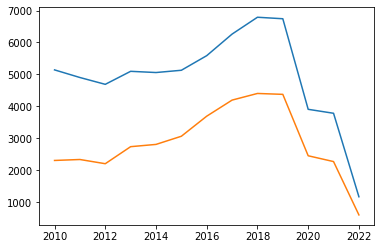

In [ ]:
san_jose_crime_males_count_by_year = san_jose_crime_males['Year'].value_counts().sort_index()
san_jose_crime_females_count_by_year = san_jose_crime_females['Year'].value_counts().sort_index()

plt.plot(san_jose_crime_males_count_by_year)
plt.plot(san_jose_crime_females_count_by_year)

Number of crimes by month for males and females

<AxesSubplot:title={'center':'Crime'}, xlabel='Month'>

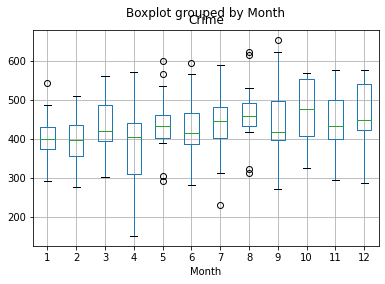

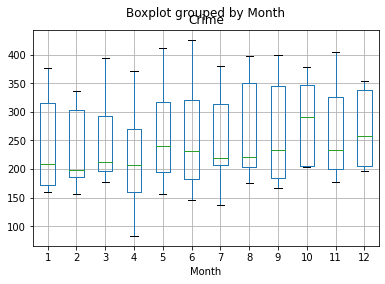

In [ ]:
san_jose_crime_males_count_by_month = san_jose_crime_males.groupby(['Year','Month']).count()['Crime'].reset_index()
san_jose_crime_females_count_by_month = san_jose_crime_females.groupby(['Year','Month']).count()['Crime'].reset_index()

san_jose_crime_males_count_by_month.boxplot(column=['Crime'],by='Month')
san_jose_crime_females_count_by_month.boxplot(column=['Crime'],by='Month')


Number of crimes by hour for males and females

<AxesSubplot:title={'center':'Crime'}, xlabel='Start Hour'>

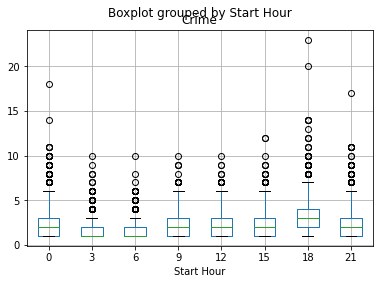

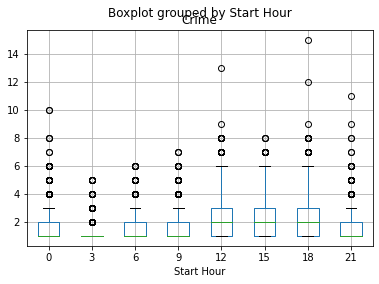

In [ ]:
san_jose_crime_males_count_by_hour = san_jose_crime_males.groupby(['Year','Month','Day','Start Hour']).count()['Crime'].reset_index()
san_jose_crime_females_count_by_hour = san_jose_crime_females.groupby(['Year','Month','Day','Start Hour']).count()['Crime'].reset_index()

san_jose_crime_males_count_by_hour.boxplot(column=['Crime'],by='Start Hour')
san_jose_crime_females_count_by_hour.boxplot(column=['Crime'],by='Start Hour')

Number of crimes by weekday for males and females

<AxesSubplot:title={'center':'Crime'}, xlabel='Weekday'>

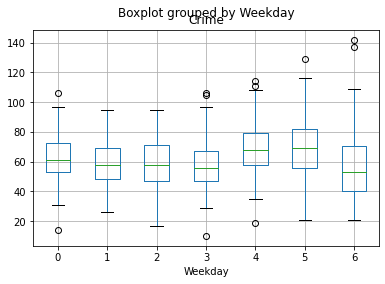

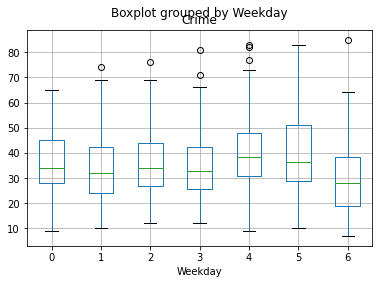

In [ ]:
san_jose_crime_males_count_by_weekday = san_jose_crime_males.groupby(['Year','Month','Weekday']).count()['Crime'].reset_index()
san_jose_crime_females_count_by_weekday = san_jose_crime_females.groupby(['Year','Month','Weekday']).count()['Crime'].reset_index()

san_jose_crime_males_count_by_weekday.boxplot(column=['Crime'],by='Weekday')
san_jose_crime_females_count_by_weekday.boxplot(column=['Crime'],by='Weekday')

Number of crimes by season for males and females

<AxesSubplot:title={'center':'Crime'}, xlabel='Season'>

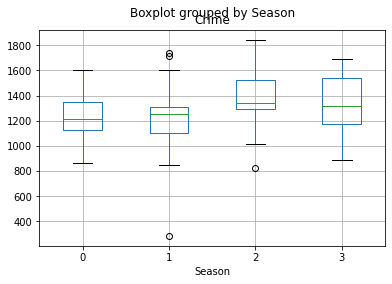

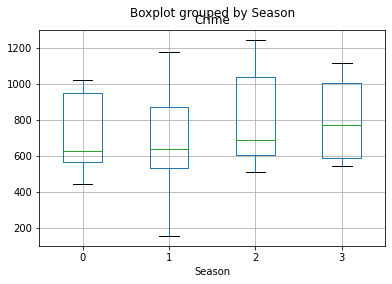

In [ ]:
san_jose_crime_males_count_by_season = san_jose_crime_males.groupby(['Year','Season']).count()['Crime'].reset_index()
san_jose_crime_females_count_by_season = san_jose_crime_females.groupby(['Year','Season']).count()['Crime'].reset_index()

san_jose_crime_males_count_by_season.boxplot(column=['Crime'],by='Season')
san_jose_crime_females_count_by_season.boxplot(column=['Crime'],by='Season')

Number of crimes per district for males and females normalised using district population

<AxesSubplot:title={'center':'0'}, xlabel='[District]'>

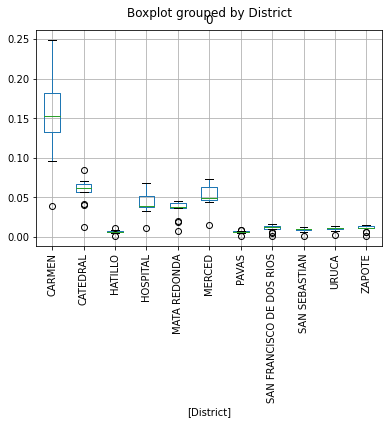

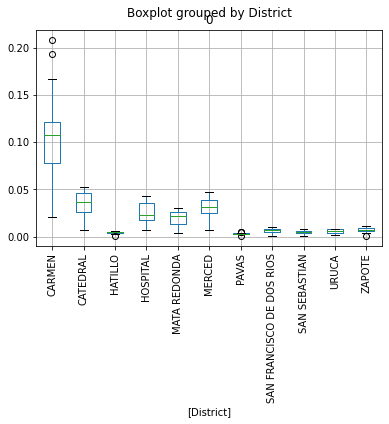

In [ ]:
san_jose_crime_males_count_by_district = san_jose_crime_males.groupby(['Year','District']).count()['Crime'].sort_values(ascending=False).reset_index()
san_jose_crime_females_count_by_district = san_jose_crime_females.groupby(['Year','District']).count()['Crime'].sort_values(ascending=False).reset_index()

san_jose_crime_males_count_by_district_norm = san_jose_crime_males_count_by_district.set_index('District')['Crime'].div(san_jose_district_dataset.set_index('District')['Población total']).reset_index()
san_jose_crime_males_count_by_district_norm = san_jose_crime_males_count_by_district_norm[san_jose_crime_males_count_by_district_norm['District']!='DESCONOCIDO']
san_jose_crime_females_count_by_district_norm = san_jose_crime_females_count_by_district.set_index('District')['Crime'].div(san_jose_district_dataset.set_index('District')['Población total']).reset_index()
san_jose_crime_females_count_by_district_norm = san_jose_crime_females_count_by_district_norm[san_jose_crime_females_count_by_district_norm['District']!='DESCONOCIDO']

san_jose_crime_males_count_by_district_norm.boxplot(by='District', rot=90)
san_jose_crime_females_count_by_district_norm.boxplot(by='District', rot=90)

In [ ]:
# Agrupar por trimestre deve ser so fixar o ano e juntar de 3 em 3 meses

## 🖼️ Visualisations
Copy here the most important visualizations (graphs, charts, maps, images, etc). You can refer to them in the Executive Summary.

Technical note: If not all the visualisations are visible, you can still include them as an image or link - in this case please upload them to your own repository.

## 👓 References
List all of the external links (even if they are already linked above), such as external datasets, papers, blog posts, code repositories and any other materials.

## ⏭️ Appendix
Add here any code, images or text that you still find relevant, but that was too long to include in the main report. This section is optional.
